# Stock Price Forecasting with ARIMA & SARIMAX

This notebook focuses on **time series forecasting** of Google (GOOG) stock prices using classical statistical models.  

### 🔹 What we do:
1. **Data Collection**  
   - Pull 1 year of historical stock data (Date, Close price) using `yfinance`.

2. **Exploratory Analysis**  
   - Visualize the stock’s **closing price trend**.  
   - Check if the data is **stationary** (using Augmented Dickey-Fuller test).  

3. **Modeling**
   - Build an **ARIMA model** → works for general time series but struggles here due to seasonality.  
   - Build a **SARIMAX model** → extends ARIMA by handling **seasonal effects** (e.g., repeating monthly/weekly patterns).

4. **Forecasting**
   - Generate **10-day ahead forecasts** of closing prices.  
   - Plot history vs predictions, including **confidence intervals**.  

### 🔹 Key Learning
- ARIMA alone is not sufficient for **seasonal financial data**.  
- SARIMAX gives a better short-term forecast by capturing **trend + seasonality**.  

👉 Final output: A side-by-side comparison of ARIMA vs SARIMAX forecasts on Google stock prices.


In [2]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG',
                      start=start_date,
                      end=end_date,
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

/tmp/ipython-input-1931141543.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('GOOG',


Price        Date        Open        High         Low       Close    Volume
Ticker                   GOOG        GOOG        GOOG        GOOG      GOOG
245    2025-08-19  203.904999  204.289993  200.929993  202.490005  13476600
246    2025-08-20  201.679993  202.169998  197.460007  200.190002  13971700
247    2025-08-21  200.720001  203.360001  200.399994  200.619995  11768900
248    2025-08-22  203.960007  209.229996  202.130005  206.720001  25723700
249    2025-08-25  207.000000  211.089996  205.949997  209.160004  22769800


We only need the date and close prices columns for the rest of the task, so let’s select both the columns and move further:

In [3]:
data = data[["Date", "Close"]]
print(data.head())

Price        Date       Close
Ticker                   GOOG
0      2024-08-26  167.127670
1      2024-08-27  165.585083
2      2024-08-28  163.714050
3      2024-08-29  162.619293
4      2024-08-30  164.321136


Now let’s visualize the close prices of Google before moving forward:

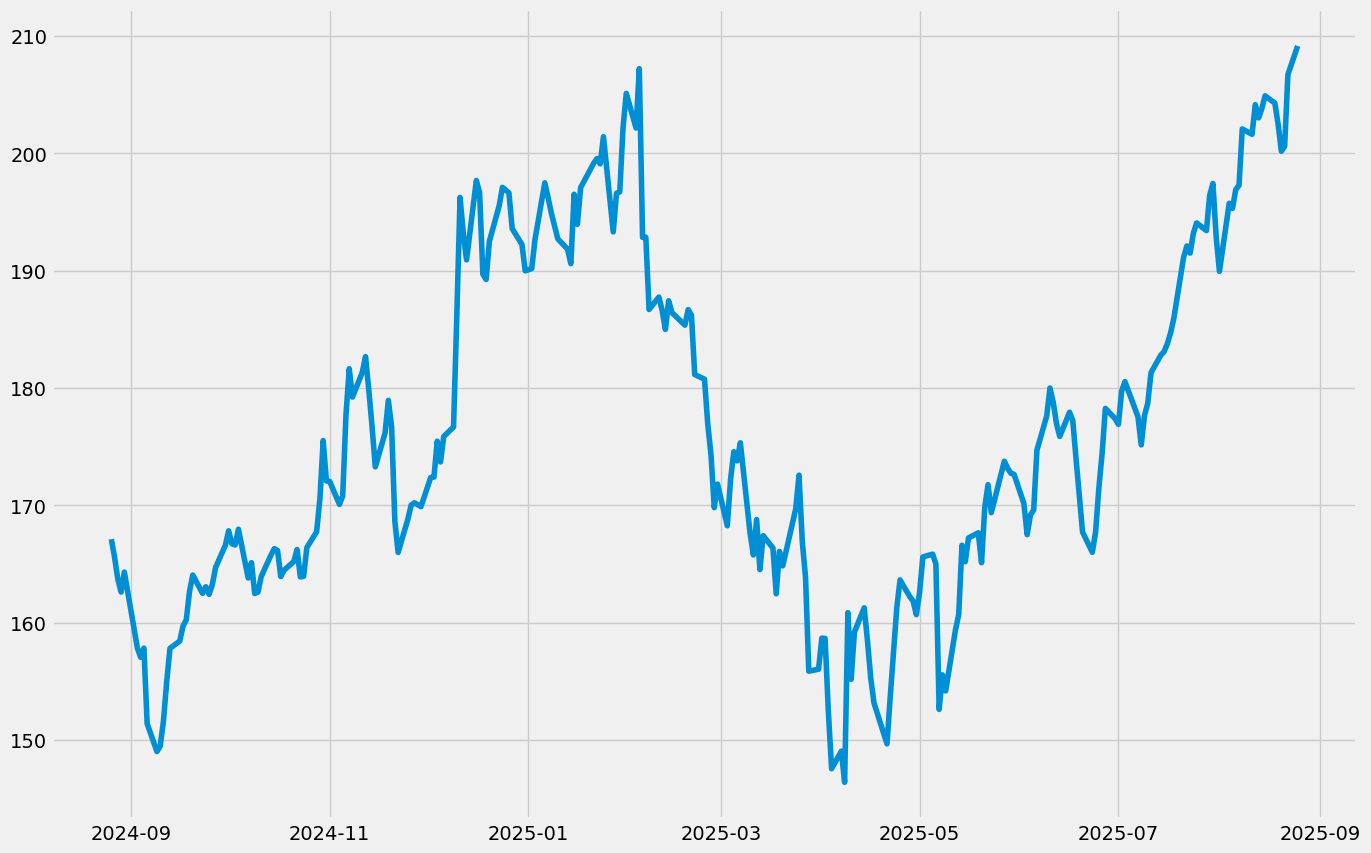

In [4]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

<Figure size 640x480 with 0 Axes>

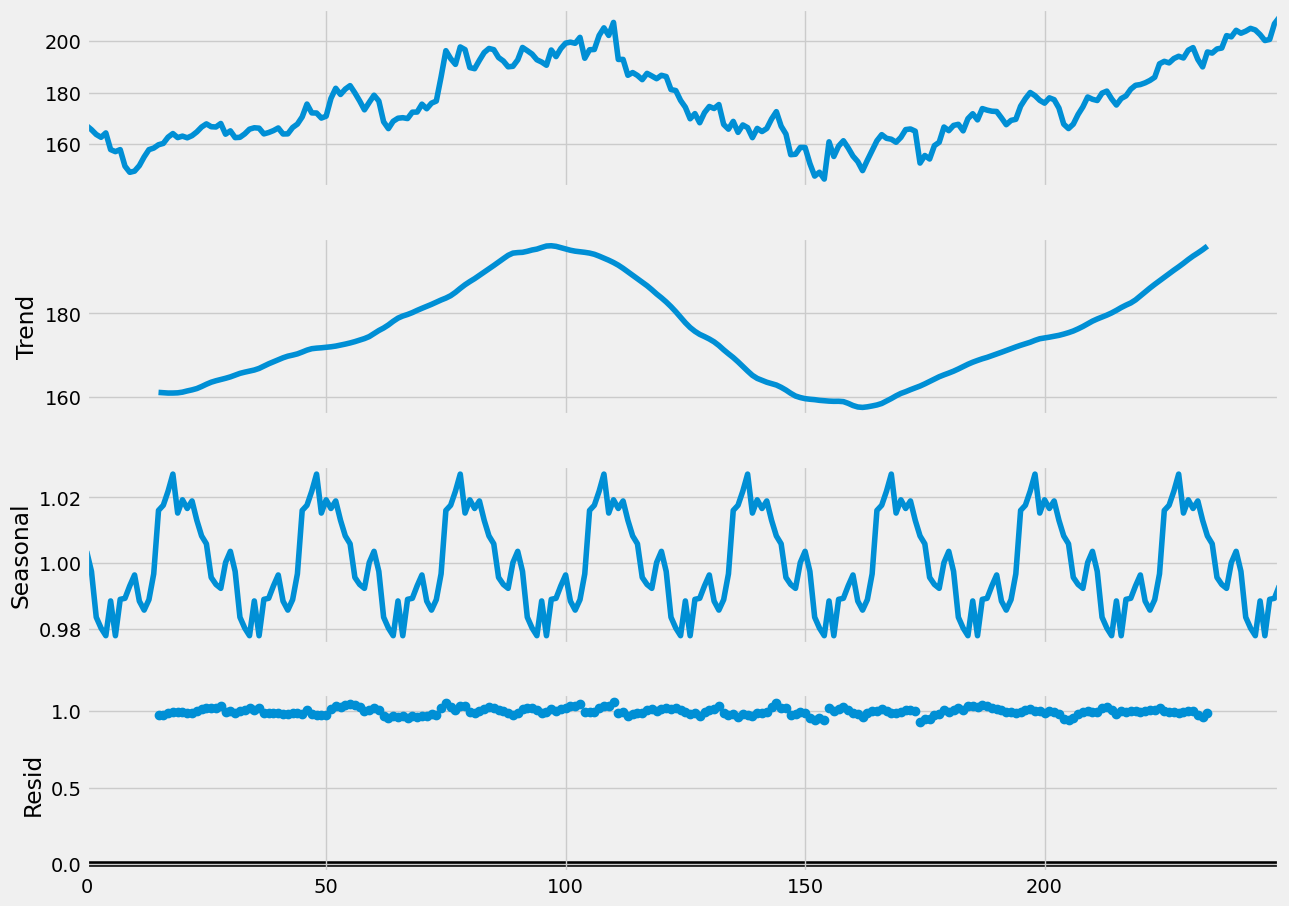

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"],
                            model='multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

So our data is not stationary it is seasonal. We need to use the Seasonal ARIMA (SARIMA) model for Time Series Forecasting on this data. But before using the SARIMA model, we will use the ARIMA model. It will help you learn using both models.

To use ARIMA or SARIMA, we need to find the p, d, and q values. We can find the value of p by plotting the autocorrelation of the Close column and the value of q by plotting the partial autocorrelation plot. The value of d is either 0 or 1. If the data is stationary, we should use 0, and if the data is seasonal, we should use 1. As our data is seasonal, we should use 1 as the d value.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

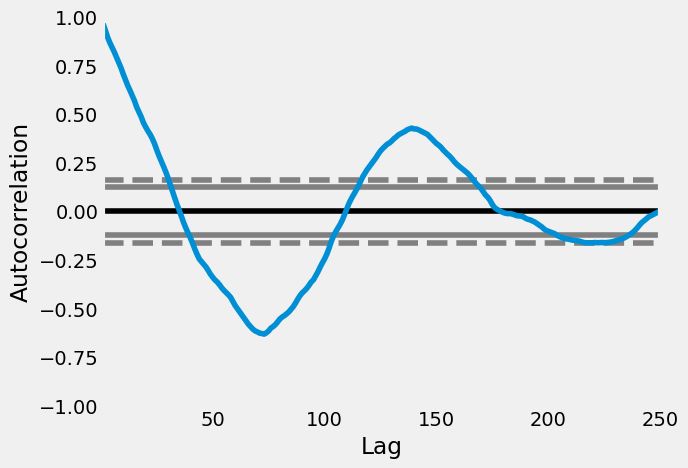

In [6]:
pd.plotting.autocorrelation_plot(data["Close"])

In the above autocorrelation plot, the curve is moving down after the 5th line of the first boundary. That is how to decide the p-value. Hence the value of p is 5. Now let’s find the value of q (moving average):

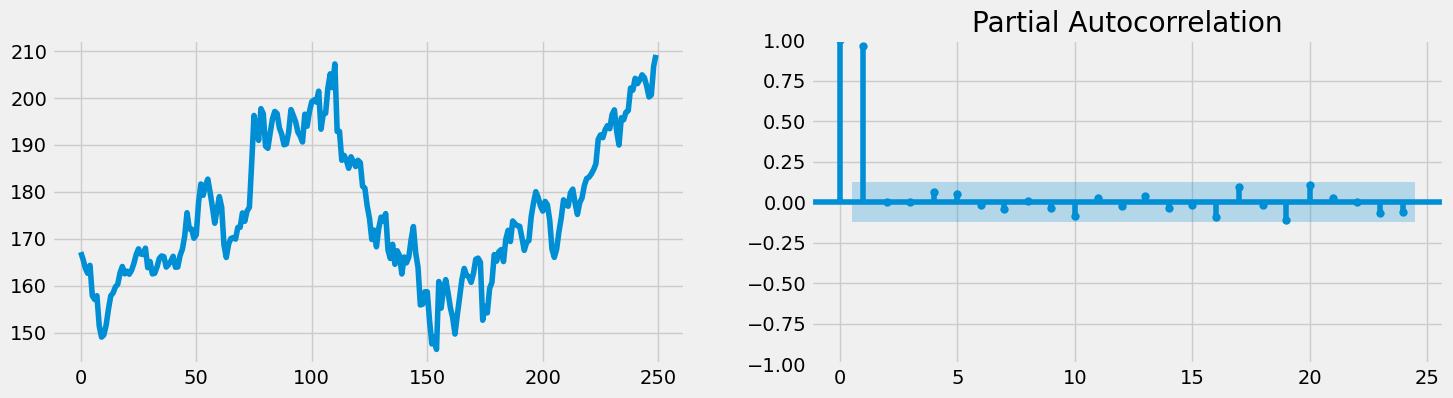

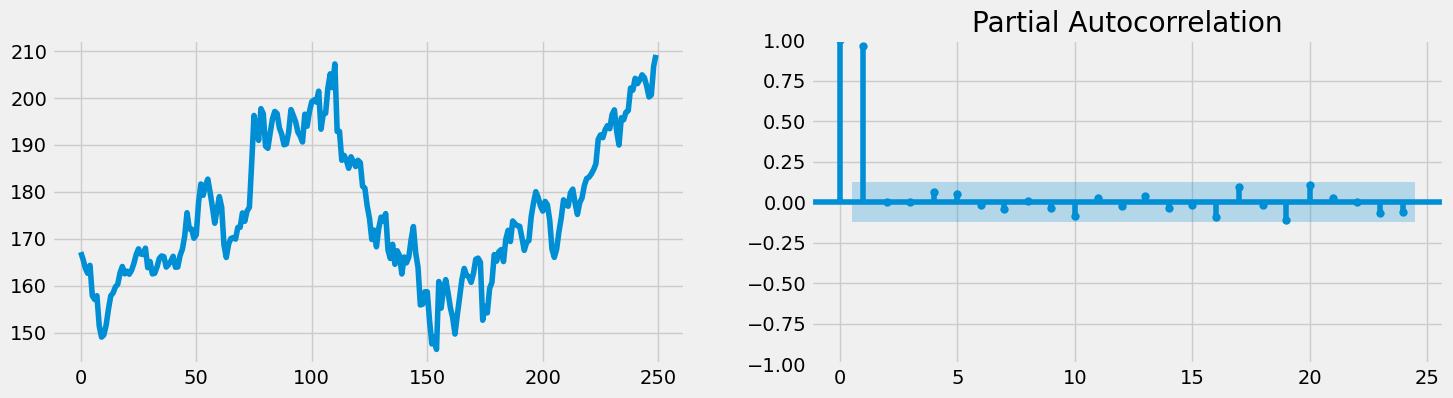

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(data['Close'])
plot_pacf(data["Close"],ax=ax2)

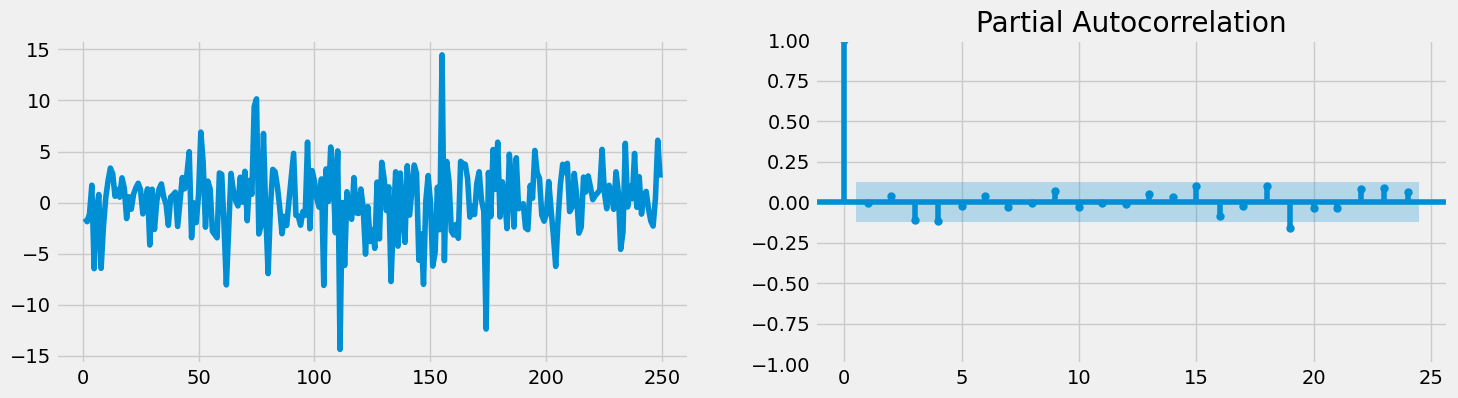

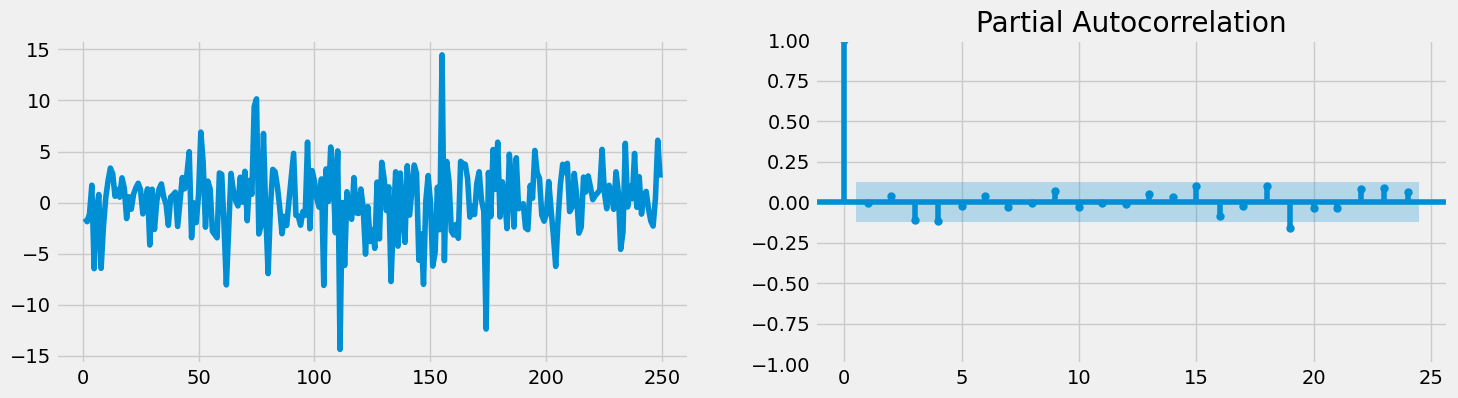

In [8]:
diff=data['Close'].diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
plot_pacf(diff,ax=ax2)

In [10]:
!pip install --upgrade pip
!pip install "numpy<2.0" "pmdarima>=2.0.4,<3.0" --no-cache-dir


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 33.8 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.2
    Uninstalling numpy-2.3.2:
      Successfully uninstalled numpy-2.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incomp

In [10]:
from pmdarima.arima.utils import ndiffs
ndiffs(data['Close'],test='adf')

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

1

ADF statistic: -1.1403433986791434
p-value: 0.6987183335980827
Critical values: {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}


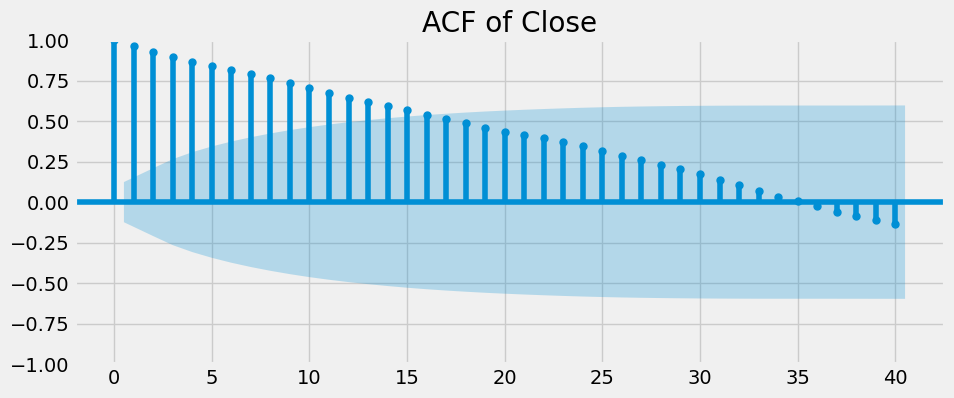

In [16]:
# Explicit ADF readout + ACF plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

series = data["Close"].dropna()

adf_stat, pval, usedlag, nobs, crit, icbest = adfuller(series)
print("ADF statistic:", adf_stat)
print("p-value:", pval)
print("Critical values:", crit)

fig, ax = plt.subplots(figsize=(10,4))
plot_acf(series, ax=ax, lags=40)
plt.title("ACF of Close")
plt.show()


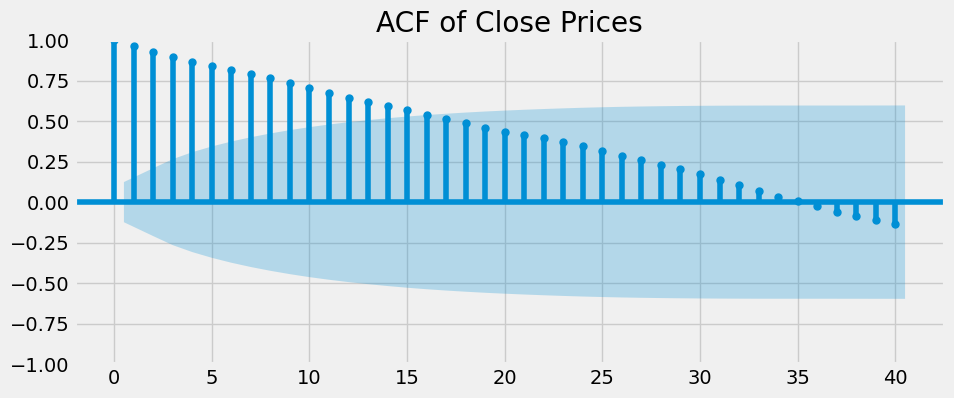

In [18]:

import numpy as np
import pandas as pd

def ensure_series1d(x):
    """Convert DataFrame/array to clean 1-D numeric Series."""
    if isinstance(x, pd.DataFrame):
        x = x.squeeze("columns")   # (n,1) -> (n,)
    x = np.ravel(np.asarray(x))
    s = pd.Series(x, dtype="float64")
    return pd.to_numeric(s, errors="coerce").dropna()


from statsmodels.graphics.tsaplots import plot_acf

series = ensure_series1d(data["Close"])

fig, ax = plt.subplots(figsize=(10,4))
plot_acf(series, ax=ax, lags=40)
plt.title("ACF of Close Prices")
plt.show()


In the above partial autocorrelation plot, we can see that only two points are far away from all the points. Hence the value of q is 2.
# ARIMA Model

In [11]:
p, d, q = 5, 1, 1
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data["Close"], order=(p,d,q))
# Fit the model
fitted = model.fit()
# Set the display option
fitted.params['disp'] = -1
# Print the summary
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                   GOOG   No. Observations:                  250
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -652.384
Date:                Tue, 26 Aug 2025   AIC                           1318.767
Time:                        13:13:57   BIC                           1343.389
Sample:                             0   HQIC                          1328.678
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4863      1.310     -0.371      0.711      -3.054       2.082
ar.L2          0.0403      0.072      0.557      0.578      -0.102       0.182
ar.L3         -0.0835      0.094     -0.888      0.3

In [12]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      167.127668
2      165.587020
3      163.649527
4      162.701663
          ...    
245    204.279267
246    202.365424
247    200.004580
248    200.770594
249    207.140312
Name: predicted_mean, Length: 250, dtype: float64


The predicted values are wrong because the data is seasonal. ARIMA model will never perform well on seasonal time series data. So, here’s how to build a SARIMAX model:

#SARIMAX Model

In [13]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               GOOG   No. Observations:                  250
Model:             SARIMAX(5, 1, 1)x(5, 1, 1, 12)   Log Likelihood                -638.023
Date:                            Tue, 26 Aug 2025   AIC                           1302.045
Time:                                    13:14:29   BIC                           1347.130
Sample:                                         0   HQIC                          1320.217
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5360      1.876     -0.286      0.775      -4.212       3.140
ar.L2          0.0217      0.091   

Now let’s predict the future stock prices using the SARIMA model for the next 10 days:



In [14]:
predictions = model.predict(len(data), len(data)+30)
print(predictions)

250    210.154884
251    211.148479
252    211.129854
253    210.150950
254    210.704614
255    210.827334
256    210.191210
257    208.912844
258    209.536550
259    209.954177
260    209.920807
261    210.746618
262    212.150161
263    213.578491
264    214.876957
265    214.368844
266    214.530793
267    214.654723
268    214.221809
269    212.812931
270    212.461956
271    212.839755
272    212.956195
273    214.160197
274    215.407997
275    216.838152
276    217.119890
277    216.397628
278    216.365140
279    216.554945
280    216.541609
Name: predicted_mean, dtype: float64


Here’s how you can plot the predictions:



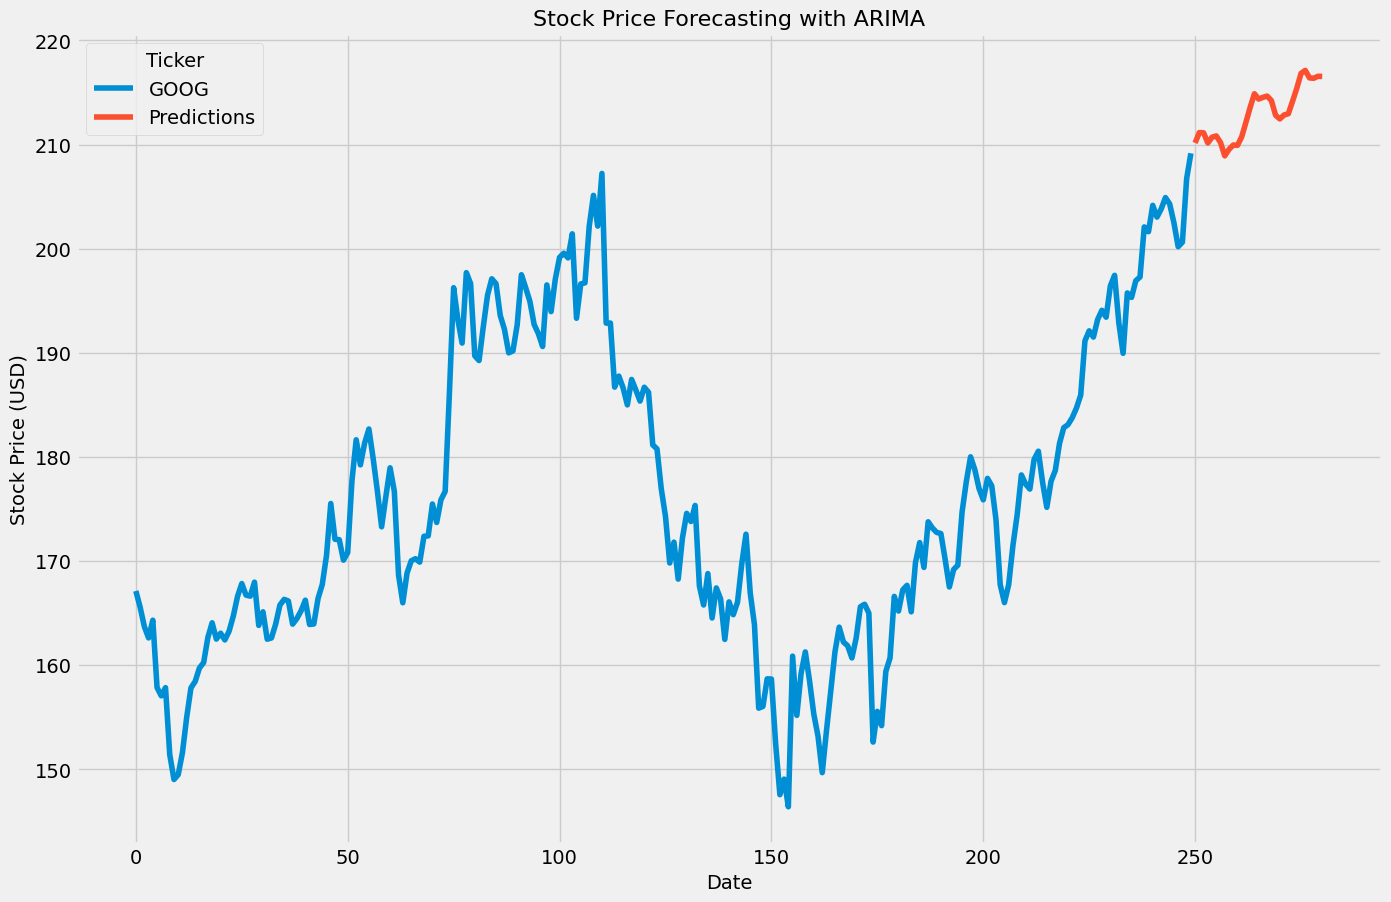

In [34]:
ax = data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions", ax=ax)

ax.set_title("Stock Price Forecasting with ARIMA", fontsize=16)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Stock Price (USD)", fontsize=14)
plt.show()


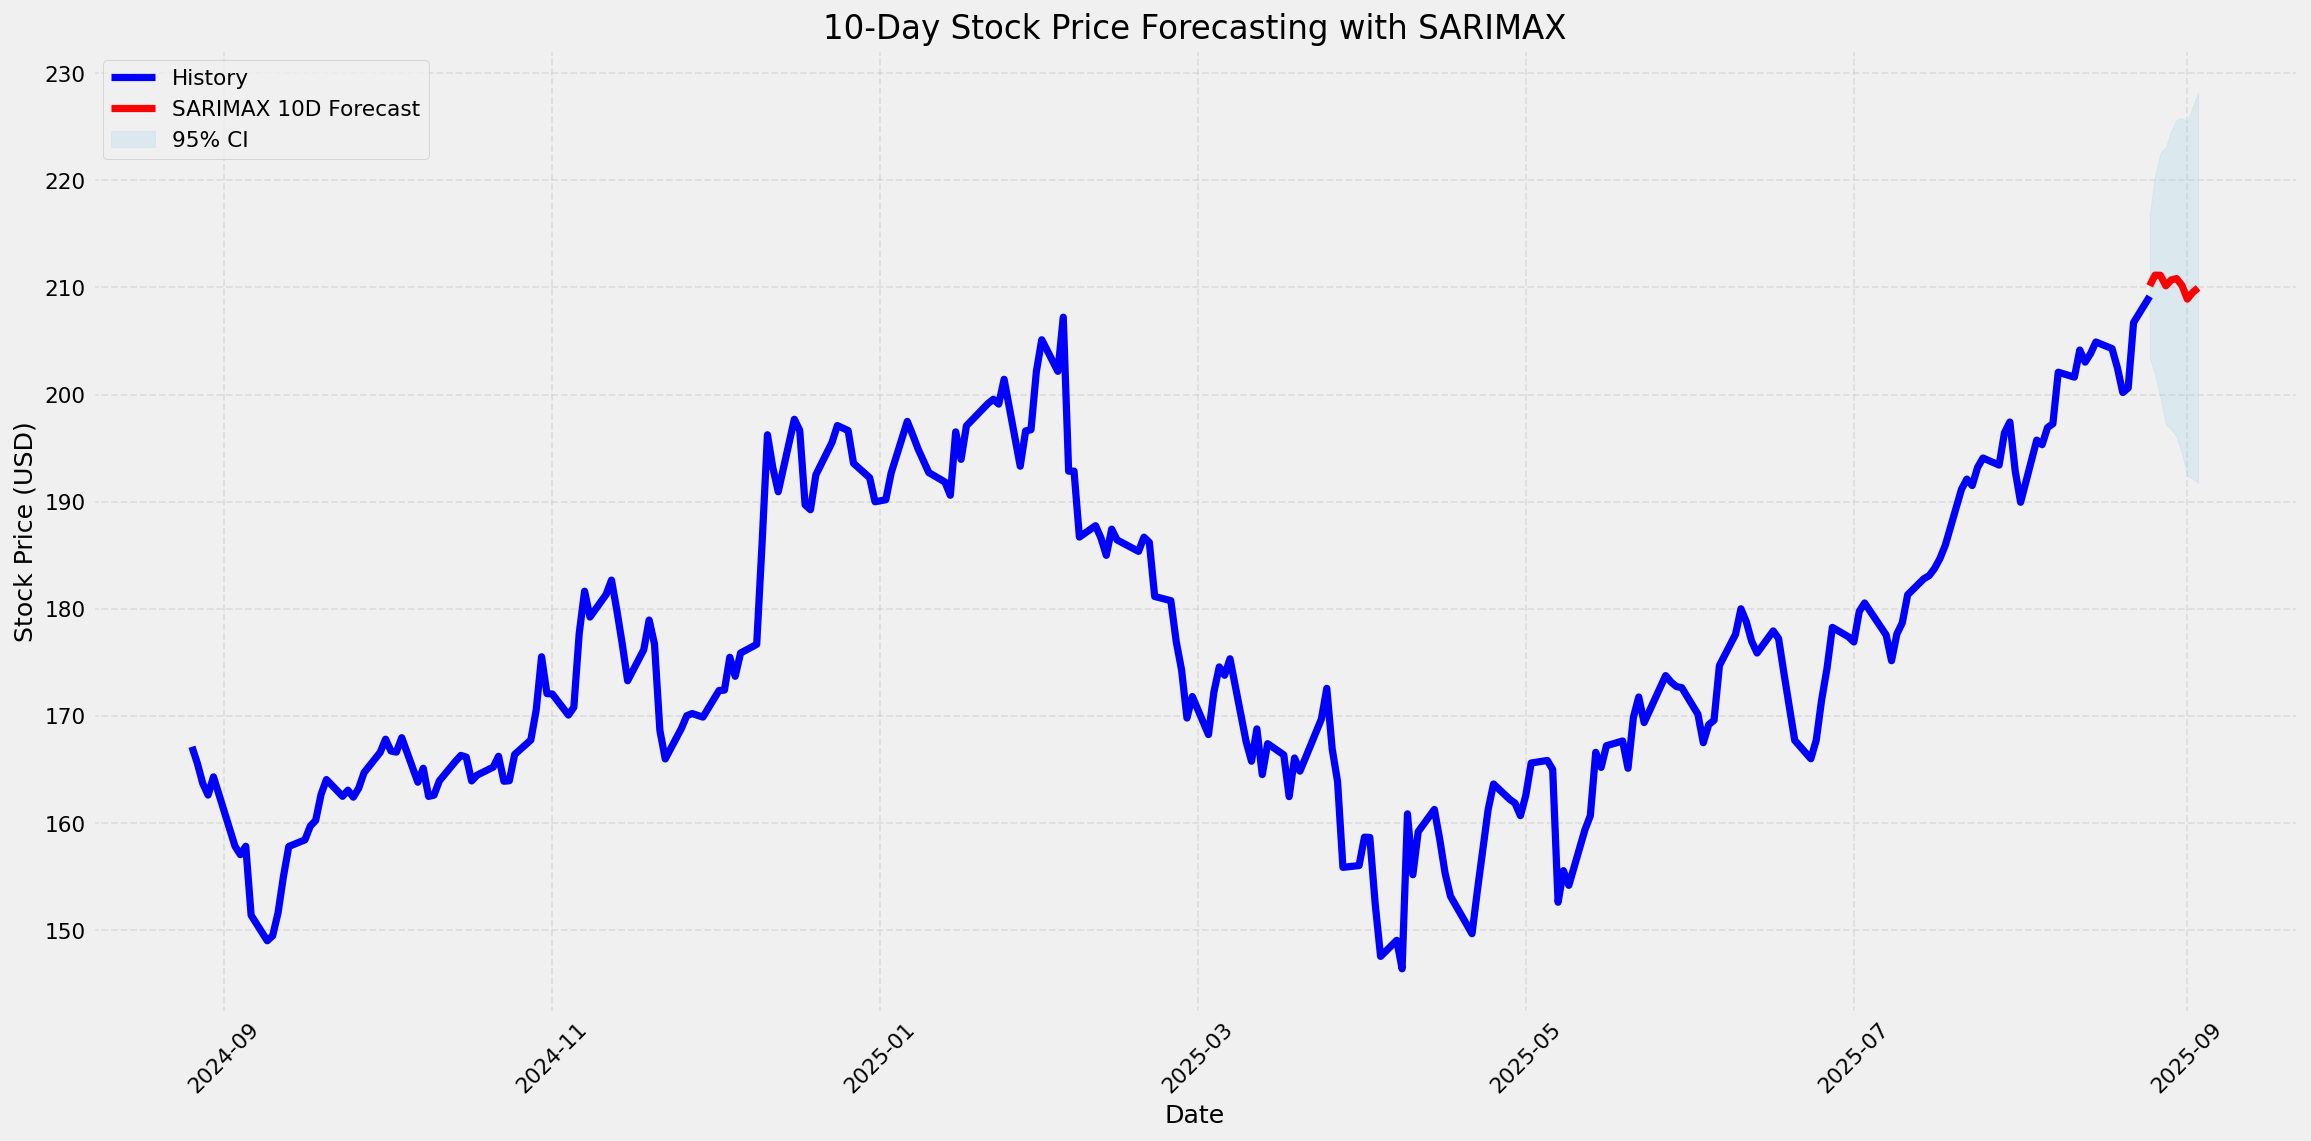

In [31]:
future_idx = pd.date_range(start=data["Date"].iloc[-1], periods=10, freq="D")

plt.figure(figsize=(18, 9), dpi=130)

plt.plot(data["Date"], data["Close"], label="History", color="blue")
plt.plot(future_idx, sarimax_fc10.values, label="SARIMAX 10D Forecast", color="red")
plt.fill_between(
    future_idx,
    sarimax_ci10.iloc[:,0].values,
    sarimax_ci10.iloc[:,1].values,
    alpha=0.2,
    color="skyblue",
    label="95% CI"
)

plt.title("10-Day Stock Price Forecasting with SARIMAX", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Stock Price (USD)", fontsize=14)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
